In [1]:
%matplotlib inline

In [2]:
# ref: http://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot
# ref: http://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
# palette=deep, muted, bright, pastel, dark, colorblind
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set default size of plots
plt.rcParams['figure.figsize']=4,2

In [3]:
# palettes for seaborn plots
sns.palettes.SEABORN_PALETTES.keys()
sns.set_palette(palette='deep')

In [4]:
# palettes for pandas plots
import pprint
pprint.pprint(plt.style.available)

plt.style.use('fivethirtyeight')

['seaborn-muted',
 'seaborn-colorblind',
 'seaborn-paper',
 'classic',
 'seaborn-poster',
 'bmh',
 'fivethirtyeight',
 'seaborn-ticks',
 'seaborn-darkgrid',
 'seaborn-white',
 'seaborn-pastel',
 'grayscale',
 'seaborn-bright',
 'seaborn-deep',
 'ggplot',
 'seaborn-talk',
 'seaborn-whitegrid',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-notebook',
 'dark_background']


In [5]:
df = pd.read_csv('https://github.com/chadwickbureau/baseballdatabank/raw/master/core/Master.csv')

In [6]:
df.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [7]:
df.describe()

,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay,weight,height
count,18966.00000,18796.000000,18647.000000,9398.000000,9397.000000,9396.000000,18248.000000,18315.000000
mean,1931.45455,6.629336,15.616989,1964.113428,6.481537,15.574181,186.344476,72.274311
std,41.54645,3.468741,8.748891,31.672343,3.523684,8.777659,21.494734,2.604105
min,1820.00000,1.000000,1.000000,1872.000000,1.000000,1.000000,65.000000,43.000000
25%,1895.00000,4.000000,8.000000,1942.000000,3.000000,8.000000,170.000000,71.000000
50%,1937.00000,7.000000,16.000000,1967.000000,6.000000,15.000000,185.000000,72.000000
75%,1969.00000,10.000000,23.000000,1990.000000,10.000000,23.000000,200.000000,74.000000
max,1996.00000,12.000000,31.000000,2016.000000,12.000000,31.000000,320.000000,83.000000


bats
B     1177
L     4958
R    11783
Name: playerID, dtype: int64


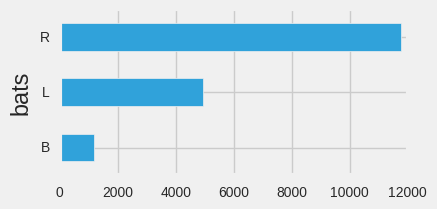

In [8]:
# number of batters by hitting hand
batters = df.groupby('bats')['playerID'].count()
ax = batters.plot.barh()
print(batters)

bats
B    71.647863
L    72.241949
R    72.480917
Name: height, dtype: float64


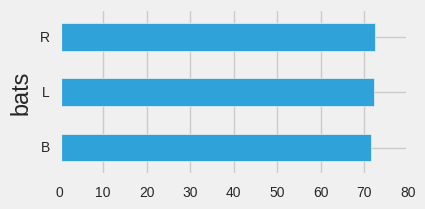

In [9]:
# mean height, grouped by hitting hand
batters = df.groupby('bats')['height'].mean()
ax = batters.plot.barh()
print(batters)

bats
B    182.010274
L    186.102977
R    187.758328
Name: weight, dtype: float64


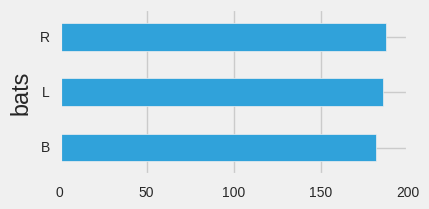

In [10]:
# mean weight, grouped by hitting hand
batters = df.groupby('bats')['weight'].mean()
ax = batters.plot.barh()
print(batters)

In [11]:
# ref: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html
# ref: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html
# ref: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.values.html
import random

# ensure sampling is consistant betweeen runs
seed = 2

# create index dataframes
l_hitters = df['bats'] == 'L'
r_hitters = df['bats'] == 'R'

# obtain the heights arrays for left hand hitters, and right hand hitters
l_height = df[l_hitters]['height'].dropna().sample(n=250, random_state=seed).values
r_height = df[r_hitters]['height'].dropna().sample(n=250, random_state=seed).values

# obtain the weights arrays for left hand hitters, and right hand hitters
l_weight = df[l_hitters]['weight'].dropna().sample(n=250, random_state=seed).values
r_weight = df[r_hitters]['weight'].dropna().sample(n=250, random_state=seed).values

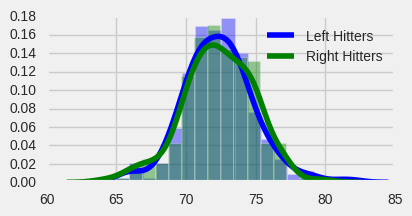

In [12]:
# is there any difference in height?
# visual insepection
fig, ax = plt.subplots()
fig = sns.distplot(l_height, ax=ax, color='blue', kde_kws={"label": "Left Hitters"})
fig = sns.distplot(r_height, ax=ax, color='green', kde_kws={"label": "Right Hitters"})

In [13]:
# t-Test
# ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
# ref: https://en.wikipedia.org/wiki/Welch%27s_t-test
from scipy import stats

# perform Welch's t-Test
t, p = stats.ttest_ind(l_height, r_height, equal_var=False)

if (p <= 0.05):
    outcome = '(Passed Test - at the 5% level) Null hypothesis rejected, therefore the mean heights are different'
else:
    outcome = '(Failed Test - at the 5% level) Null hypothesis not rejected, therefore we consider the mean heights to be equal'
    
print("P-value\t= {:5.3}\nt-stat\t= {:5.3}\n{}".format(p,t,outcome))

P-value	= 0.972
t-stat	= 0.0347
(Failed Test - at the 5% level) Null hypothesis not rejected, therefore we consider the mean heights to be equal


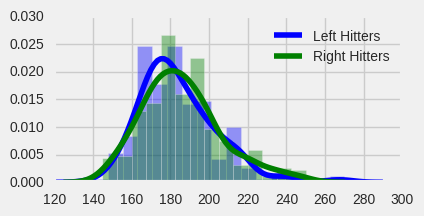

In [14]:
# is there any difference in weight?
# visual inspection
fig, ax = plt.subplots()
fig = sns.distplot(l_weight, ax=ax, color='blue', kde_kws={"label": "Left Hitters"})
fig = sns.distplot(r_weight, ax=ax, color='green', kde_kws={"label": "Right Hitters"})

In [15]:
# perform Welch's t-Test
t, p = stats.ttest_ind(l_weight, r_weight, equal_var=False)

if (p <= 0.05):
    outcome = '(Passed Test - at the 5% level) Null hypothesis rejected, therefore the mean weights are different'
else:
    outcome = '(Failed Test - at the 5% level) Null hypothesis not rejected, therefore we consider the mean weights to be equal'
    
print("P-value\t= {:5.3}\nt-stat\t= {:5.3}\n{}".format(p,t,outcome))

P-value	=  0.36
t-stat	= -0.915
(Failed Test - at the 5% level) Null hypothesis not rejected, therefore we consider the mean weights to be equal
